# Task 1: Classify customer reviews into positive, negative, or neutral categories to help the company improve its products and services. 

### Load Kaggle credentials from .env and download dataset securely

1. Reads Kaggle API credentials (username + key) from a .env file.
2. Sets them as environment variables so the Kaggle API can use them.
3. Downloads and unzips the dataset into your local `data/` folder.

In [5]:
import os
from dotenv import load_dotenv
from kaggle.api.kaggle_api_extended import KaggleApi

# Load .env file
load_dotenv()

# Confirm that the environment variables loaded
print("KAGGLE_USERNAME:", os.getenv("KAGGLE_USERNAME"))
print("KAGGLE_KEY loaded:", bool(os.getenv("KAGGLE_KEY")))  # should print True

# Authenticate with Kaggle
api = KaggleApi()
api.authenticate()

# Create data folder
os.makedirs("../data", exist_ok=True)

# Download the dataset
api.dataset_download_files(
    "datafiniti/consumer-reviews-of-amazon-products",
    path="../data",
    unzip=True
)

print("✅ Dataset downloaded to ../data/")


KAGGLE_USERNAME: sofiazogkza
KAGGLE_KEY loaded: True
Dataset URL: https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products
✅ Dataset downloaded to ../data/


### Load and Explore data

Load all the files and explore them.

In [6]:
import pandas as pd

file1 = "../data/1429_1.csv"
file2 = "../data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv"
file3 = "../data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv"

# Load your three CSV files
df1 = pd.read_csv(file1, low_memory=False)
df2 = pd.read_csv(file2, low_memory=False)
df3 = pd.read_csv(file3, low_memory=False)

# Combine the datasets of the 3 files
df_combined = pd.concat([df1, df2, df3], ignore_index=True)
print("Combined shape:", df_combined.shape)

# Remove dublicates
df_combined.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", df_combined.shape)

Combined shape: (67992, 27)
Shape after removing duplicates: (67897, 27)


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Show all columns fully
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Basic Info
print("Number of rows:", df_combined.shape[0])
print("Number of columns:", df_combined.shape[1])

Number of rows: 67897
Number of columns: 27


In [9]:
# Full column display order + type
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67897 entries, 0 to 67991
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    67897 non-null  object 
 1   name                  61137 non-null  object 
 2   asins                 67895 non-null  object 
 3   brand                 67897 non-null  object 
 4   categories            67897 non-null  object 
 5   keys                  67897 non-null  object 
 6   manufacturer          67897 non-null  object 
 7   reviews.date          67858 non-null  object 
 8   reviews.dateAdded     25083 non-null  object 
 9   reviews.dateSeen      67897 non-null  object 
 10  reviews.didPurchase   10 non-null     object 
 11  reviews.doRecommend   55057 non-null  object 
 12  reviews.id            71 non-null     float64
 13  reviews.numHelpful    55151 non-null  float64
 14  reviews.rating        67864 non-null  float64
 15  reviews.sourceURLs    67

In [10]:
# # ALL Missing values
# missing_percent2 = (df_small_file.isnull().sum() / len(df_small_file) * 100).sort_values(ascending=False)
# print("\nMissing values (%) does not include 0%:\n", missing_percent2[missing_percent2 > 0].to_string())

# SHows ALL the columns with percentage
missing_percent = (df_combined.isnull().sum() / len(df_combined) * 100).sort_values(ascending=False)
print("\nMissing values (%):\n", missing_percent.to_string())



Missing values (%):
 reviews.userProvince    100.000000
reviews.userCity        100.000000
reviews.didPurchase      99.985272
reviews.id               99.895430
reviews.dateAdded        63.057278
sourceURLs               51.047911
manufacturerNumber       51.047911
imageURLs                51.047911
primaryCategories        51.047911
dateUpdated              51.047911
dateAdded                51.047911
reviews.doRecommend      18.910998
reviews.numHelpful       18.772553
name                      9.956257
reviews.date              0.057440
reviews.rating            0.048603
reviews.title             0.027984
reviews.username          0.019147
asins                     0.002946
reviews.text              0.001473
reviews.sourceURLs        0.000000
reviews.dateSeen          0.000000
manufacturer              0.000000
keys                      0.000000
categories                0.000000
brand                     0.000000
id                        0.000000


In [11]:
# Sample rows
print(df_combined.head().to_string())

                     id                                                                                     name       asins   brand                                                                       categories                                                                                                                                                                                                                 keys manufacturer              reviews.date     reviews.dateAdded                                   reviews.dateSeen reviews.didPurchase reviews.doRecommend  reviews.id  reviews.numHelpful  reviews.rating                                                                                                                                         reviews.sourceURLs                                                                                                                                                                                                                           

In [12]:
# Check how many unique ids i have
df_combined['id'].nunique()

92

In [13]:
df_combined['name'].nunique()

125

In [14]:
# Count missing values
missing_counts = df_combined[['reviews.text', 'reviews.rating']].isnull().sum()
print(missing_counts)

# Or as a percentage
missing_percent = (df_combined[['reviews.text', 'reviews.rating']].isnull().mean() * 100)
print(missing_percent)

reviews.text       1
reviews.rating    33
dtype: int64
reviews.text      0.001473
reviews.rating    0.048603
dtype: float64


Result for Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products: 
- Number of rows: 67897
- Number of columns: 27
- 92 unique ids. 
- 125 unique names.

- Image urls are huge : drop them


This means to me, that i can group by ids or names the products.

### 🧹 Clean the dataframe from unessesary info - for Task 1 (classifying reviews as **positive/negative/neutral**)

In [15]:
# Keep only the columns you want
df_classification = df_combined[['reviews.text', 'reviews.rating']].copy()

In [16]:
df_classification.head()

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0


#### 🔹 Convert `reviews.rating` to **Sentimental** Labels

In [17]:
def rating_to_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

df_classification['sentiment'] = df_classification['reviews.rating'].apply(rating_to_sentiment)
df_classification['sentiment'].value_counts() # Check the distribution of the values.

sentiment
positive    62461
neutral      2898
negative     2538
Name: count, dtype: int64

For the small file:
- positive    62461
- neutral      2898
- negative     2538

This is highly imbalanced. If I train a classifier on this directly, it will likely predict mostly positive because that class dominates.

In [18]:
df_classification['reviews.text'].isna().sum()

np.int64(1)

### ⚙️ Pre-process

In [20]:
import re

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_classification['clean_text'] = df_classification['reviews.text'].apply(clean_text)


In [21]:
df_classification.head()
#df_classification.shape

,reviews.text,reviews.rating,sentiment,clean_text
0,This product so far has not disappointed. My c...,5.0,positive,this product so far has not disappointed my ch...
1,great for beginner or experienced person. Boug...,5.0,positive,great for beginner or experienced person bough...
2,Inexpensive tablet for him to use and learn on...,5.0,positive,inexpensive tablet for him to use and learn on...
3,I've had my Fire HD 8 two weeks now and I love...,4.0,positive,ive had my fire hd two weeks now and i love it...
4,I bought this for my grand daughter when she c...,5.0,positive,i bought this for my grand daughter when she c...


Prepare your data

Convert text to numeric features (TF-IDF + n-grams)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


# Your cleaned dataset
X = df_classification['clean_text']  # input text
y = df_classification['sentiment']   # target labels

# Split into train and test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# TF-IDF Vectorizer with uni-grams and bi-grams
vectorizer = TfidfVectorizer(
    max_features=5000,     # keep top 5000 words
    ngram_range=(1, 2),    # unigrams + bigrams
    stop_words='english'   # remove common stopwords
)

# Fit on training data, transform both train and test
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Train a classifier & Predict | Evaluate the model

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Use class_weight='balanced' to handle imbalance
model = LogisticRegression(max_iter=500, class_weight='balanced', random_state=42)

# Train
model.fit(X_train_tfidf, y_train)

# Predict
y_pred = model.predict(X_test_tfidf)

# Evaluate
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.39      0.77      0.51       507
     neutral       0.21      0.63      0.32       580
    positive       0.98      0.85      0.91     12493

    accuracy                           0.84     13580
   macro avg       0.53      0.75      0.58     13580
weighted avg       0.93      0.84      0.87     13580

[[  389    78    40]
 [   87   368   125]
 [  532  1304 10657]]


Thats a very bad score because it is highly imbalanced - Even though I used `class_weight='balanced'`.

The daatset is extremely **skewed**.

### 🧬 Apply SMOTE (Synthetic Minority Oversampling Technique) is a method used to handle imbalanced datasets.

1. SMOTE looks at each sample from the minority class.

2. It finds its nearest neighbors (other samples of the same class).

3. It then generates **new, synthetic samples** by interpolating between them.

For example, if two “negative” reviews are represented as numeric TF-IDF vectors, SMOTE can create a new one in between — combining characteristics of both.

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Apply SMOTE only on training data (never on test!)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train)

print("Before SMOTE:", X_train_tfidf.shape, "After SMOTE:", X_train_balanced.shape)

# Train the model again on the rebalanced data
model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# Predict on the original test set
y_pred = model.predict(X_test_tfidf)

#Evaluate
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Before SMOTE: (54317, 5000) After SMOTE: (149904, 5000)
              precision    recall  f1-score   support

    negative       0.40      0.75      0.52       507
     neutral       0.23      0.56      0.33       580
    positive       0.98      0.88      0.93     12493

    accuracy                           0.86     13580
   macro avg       0.54      0.73      0.59     13580
weighted avg       0.92      0.86      0.88     13580

[[  382    58    67]
 [   80   325   175]
 [  499  1030 10964]]


In [25]:
import numpy as np
from collections import Counter

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_balanced))


Before SMOTE: Counter({'positive': 49968, 'neutral': 2318, 'negative': 2031})
After SMOTE: Counter({'positive': 49968, 'neutral': 49968, 'negative': 49968})


### Observations:

SMOTE is working as intended as it incresed the neutral and negative values which are the **minority classes**.

Unfortunatelly it didn't do much difference in precision, recall or accuracy.

Reason: Maybe because of the TEST set imbalance: Test set still has majority of positives vs 175 neutral and 67 negative.

**RESULT** : I will use non-Linear model.

### NON-LINEAR SVM with TF-IF and SMOTE

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# 1️⃣ Split data
X = df_classification['clean_text']
y = df_classification['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2️⃣ TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 3️⃣ Apply SMOTE to balance minority classes
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_tfidf, y_train)

print("Before SMOTE:", X_train_tfidf.shape, "After SMOTE:", X_train_bal.shape)

# 4️⃣ Non-linear SVM
# RBF kernel allows complex decision boundaries
model = SVC(kernel='rbf', class_weight='balanced', C=1.0, gamma='scale', random_state=42)
model.fit(X_train_bal, y_train_bal)

# 5️⃣ Predict on the test set
y_pred = model.predict(X_test_tfidf)

# 6️⃣ Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Before SMOTE: (54317, 5000) After SMOTE: (149904, 5000)
              precision    recall  f1-score   support

    negative       0.87      0.60      0.71       507
     neutral       0.74      0.44      0.55       580
    positive       0.96      0.99      0.98     12493

    accuracy                           0.95     13580
   macro avg       0.86      0.68      0.74     13580
weighted avg       0.95      0.95      0.95     13580

[[  303    12   192]
 [   13   253   314]
 [   32    76 12385]]


Run for 22m 19.3 seconds

Before SMOTE: (54317, 5000) 

After SMOTE: (149904, 5000)

              precision    recall  f1-score   support
### **Classification Report**

| Class            | Precision | Recall | F1-Score | Support |
| ---------------- | ---------- | ------- | -------- | ------- |
| Negative         | 0.87       | 0.60    | 0.71     | 507     |
| Neutral          | 0.74       | 0.44    | 0.55     | 580     |
| Positive         | 0.96       | 0.99    | 0.98     | 12493   |
| **Accuracy**     | -          | -       | 0.95     | 13580   |
| **Macro Avg**    | 0.86       | 0.68    | 0.74     | 13580   |
| **Weighted Avg** | 0.95       | 0.95    | 0.95     | 13580   |


### **Confusion Matrix**

|                     | Pred Negative | Pred Neutral | Pred Positive |
| ------------------- | ------------- | ------------- | -------------- |
| **Actual Negative** | 303           | 12            | 192            |
| **Actual Neutral**  | 13            | 253           | 314            |
| **Actual Positive** | 32            | 76            | 12385          |

---



With the small file (5000 rows)

| Class            | Precision | Recall | F1-Score | Support |
| ---------------- | --------- | ------ | -------- | ------- |
| Negative         | 1.00      | 0.26   | 0.41     | 23      |
| Neutral          | 0.80      | 0.10   | 0.18     | 40      |
| Positive         | 0.95      | 1.00   | 0.97     | 937     |
| **Accuracy**     | -         | -      | 0.95     | 1000    |
| **Macro Avg**    | 0.92      | 0.45   | 0.52     | 1000    |
| **Weighted Avg** | 0.94      | 0.95   | 0.93     | 1000    |

Confusion Matrix

|                     | Pred Negative | Pred Neutral | Pred Positive |
| ------------------- | ------------- | ------------ | ------------- |
| **Actual Negative** | 6             | 0            | 17            |
| **Actual Neutral**  | 0             | 4            | 36            |
| **Actual Positive** | 0             | 1            | 936           |


### Non-linear SVM with Transformer Embeddings for Sentiment Classification - NO TF-IF - NO SMOTE

In [28]:
# from sentence_transformers import SentenceTransformer
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report, confusion_matrix

# # Encode text using Sentence Transformers
# model = SentenceTransformer('all-MiniLM-L6-v2')  # fast and compact
# X_embeddings = model.encode(df_classification['clean_text'], show_progress_bar=True)

# X_train, X_test, y_train, y_test = train_test_split(
#     X_embeddings, df_classification['sentiment'],
#     test_size=0.2, stratify=df_classification['sentiment'], random_state=42
# )

# # Train SVM with class weights
# svm_model = SVC(kernel='rbf', class_weight='balanced', C=1.0, gamma='scale', random_state=42)
# svm_model.fit(X_train, y_train)

# y_pred = svm_model.predict(X_test)

# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Encode text using Sentence Transformers
model = SentenceTransformer('all-MiniLM-L6-v2')  # fast and compact

# Convert Series to list to avoid KeyError
texts = df_classification['clean_text'].tolist()

X_embeddings = model.encode(texts, show_progress_bar=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_embeddings,
    df_classification['sentiment'],
    test_size=0.2,
    stratify=df_classification['sentiment'],
    random_state=42
)

# Train SVM with class weights
svm_model = SVC(kernel='rbf', class_weight='balanced', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Batches: 100%|██████████| 2122/2122 [00:45<00:00, 46.95it/s] 


              precision    recall  f1-score   support

    negative       0.59      0.77      0.67       507
     neutral       0.36      0.63      0.46       580
    positive       0.98      0.94      0.96     12493

    accuracy                           0.92     13580
   macro avg       0.65      0.78      0.70     13580
weighted avg       0.94      0.92      0.93     13580

[[  389    56    62]
 [   58   364   158]
 [  208   591 11694]]


Batches: 100%|██████████| 157/157 [00:06<00:00, 24.50it/s]

| Class            | Precision | Recall | F1-Score | Support |
| ---------------- | --------- | ------ | -------- | ------- |
| Negative         | 0.63      | 0.52   | 0.57     | 23      |
| Neutral          | 0.28      | 0.28   | 0.28     | 40      |
| Positive         | 0.96      | 0.96   | 0.96     | 937     |
| **Accuracy**     | -         | -      | 0.93     | 1000    |
| **Macro Avg**    | 0.62      | 0.59   | 0.60     | 1000    |
| **Weighted Avg** | 0.92      | 0.93   | 0.92     | 1000    |

Consfusion Matrix


|                     | Pred Negative | Pred Neutral | Pred Positive |
| ------------------- | ------------- | ------------ | ------------- |
| **Actual Negative** | 12            | 0            | 11            |
| **Actual Neutral**  | 1             | 11           | 28            |
| **Actual Positive** | 6             | 28           | 903           |

Observations:

- Negative class: now the model correctly predicts 12/23 (instead of just 6 previously).

- Neutral class: still tricky -> only 11/40 correct. 

- Positive class: almost perfect, still dominating predictions.



### Sentence Transformer embeddings + XGBoost

In [30]:
# 1️⃣ Imports
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from collections import Counter
import numpy as np

# 2️⃣ Reset index to avoid non-contiguous index issues
df_classification = df_classification.reset_index(drop=True)

# 3️⃣ Convert text column to list
texts = df_classification['clean_text'].tolist()

# 4️⃣ Encode text using Sentence Transformers
embed_model = SentenceTransformer('all-MiniLM-L6-v2')  # fast & compact
X_embeddings = embed_model.encode(texts, show_progress_bar=True)

# 5️⃣ Encode sentiment labels as integers
le = LabelEncoder()
y_encoded = le.fit_transform(df_classification['sentiment'])  # negative=0, neutral=1, positive=2

# 6️⃣ Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_embeddings, y_encoded,
    test_size=0.2,
    stratify=y_encoded,
    random_state=42
)

# 7️⃣ Compute sample weights to handle class imbalance
counter = Counter(y_train)
total = sum(counter.values())
class_weights = {cls: total/count for cls, count in counter.items()}
sample_weights = np.array([class_weights[label] for label in y_train])

# 8️⃣ Train XGBoost classifier with multi-class probabilities
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',  # multi-class probabilities
    num_class=3,                 # number of classes
    eval_metric='mlogloss',
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

xgb_model.fit(X_train, y_train, sample_weight=sample_weights)

# 9️⃣ Predict probabilities
probs = xgb_model.predict_proba(X_test)  # shape (num_samples, num_classes)

# 10️⃣ Apply custom thresholds to boost minority classes (optional)
threshold_multipliers = np.array([1.5, 1.2, 1.0])  # negative, neutral, positive
y_pred_custom = np.argmax(probs * threshold_multipliers, axis=1)

# 11️⃣ Convert numeric predictions back to original labels
y_pred_labels = le.inverse_transform(y_pred_custom)
y_test_labels = le.inverse_transform(y_test)

# 12️⃣ Evaluation
print("Classification Report:\n")
print(classification_report(y_test_labels, y_pred_labels))
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test_labels, y_pred_labels))


'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: f9aaae82-5886-49b8-8dfa-38640d16a0b3)')' thrown while requesting HEAD https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2/resolve/main/./modules.json
Retrying in 1s [Retry 1/5].
Batches: 100%|██████████| 2122/2122 [00:38<00:00, 54.94it/s] 


Classification Report:

              precision    recall  f1-score   support

    negative       0.67      0.75      0.71       507
     neutral       0.62      0.48      0.54       580
    positive       0.97      0.98      0.97     12493

    accuracy                           0.95     13580
   macro avg       0.76      0.74      0.74     13580
weighted avg       0.94      0.95      0.95     13580


Confusion Matrix:

[[  379    24   104]
 [   39   281   260]
 [  144   148 12201]]


### Classification Report

| Class            | Precision | Recall | F1-Score | Support |
| ---------------- | --------- | ------ | -------- | ------- |
| Negative         | 0.67      | 0.75   | 0.71     | 507     |
| Neutral          | 0.62      | 0.48   | 0.54     | 580     |
| Positive         | 0.97      | 0.98   | 0.97     | 12493   |
| **Accuracy**     | -         | -      | 0.95     | 13580   |
| **Macro Avg**    | 0.76      | 0.74   | 0.74     | 13580   |
| **Weighted Avg** | 0.94      | 0.95   | 0.95     | 13580   |

---

### Confusion Matrix

|                     | Pred Negative | Pred Neutral | Pred Positive |
| ------------------- | ------------- | ------------ | ------------- |
| **Actual Negative** | 379           | 24           | 104           |
| **Actual Neutral**  | 39            | 281          | 260           |
| **Actual Positive** | 144           | 148          | 12201         |


## Report

#### Objective: The goal was to classify Amazon product reviews into three sentiment categories: positive, neutral, negative. The dataset is highly imbalanced, with the majority of reviews labeled as positive.

- Positive: 4686

- Neutral: 197

- Negative: 117

This extreme **skew** required experimenting with data preprocessing, sampling techniques, and different classifiers.

### Observation:

- Probability multipliers helped precision of neutral class (0.71 vs 0.28 previously), but recall still low.

- Negative recall decreased slightly (0.52 → 0.35).

- Positive predictions remain almost perfect.

- Overall accuracy remains high due to dominance of positives.

### ✅ Key Takeaways

Class imbalance dominates results:

1. Positive reviews are easy to predict due to abundance.

2. Minority classes (neutral, negative) are harder to predict.

3. SMOTE helps training balance, but test performance gains are limited because test set is skewed.

4. Dense embeddings (SentenceTransformers) outperform TF-IDF for minority classes, especially negative reviews.

5. Non-linear models (SVM, XGBoost) capture more complex patterns than Logistic Regression.

6. Probability multipliers / sample weighting can improve minority class precision, but recall remains challenging.

7. Neutral class remains the hardest due to semantic overlap with positive/negative reviews and small sample size.

#### 1. TF-IDF + Logistic Regression

| Class        | Precision | Recall | F1-Score | Support |
| ------------ | --------- | ------ | -------- | ------- |
| Negative     | 0.48      | 0.48   | 0.48     | 23      |
| Neutral      | 0.16      | 0.23   | 0.18     | 40      |
| Positive     | 0.96      | 0.94   | 0.95     | 937     |
| **Accuracy** | -         | -      | 0.90     | 1000    |

#### 2. TF-IDF + Logistic Regression + SMOTE

| Class        | Precision | Recall | F1-Score | Support |
| ------------ | --------- | ------ | -------- | ------- |
| Negative     | 0.46      | 0.48   | 0.47     | 23      |
| Neutral      | 0.22      | 0.23   | 0.22     | 40      |
| Positive     | 0.96      | 0.96   | 0.96     | 937     |
| **Accuracy** | -         | -      | 0.92     | 1000    |

#### 3. TF-IDF + Non-linear SVM (RBF Kernel) + SMOTE

| Class        | Precision | Recall | F1-Score | Support |
| ------------ | --------- | ------ | -------- | ------- |
| Negative     | 1.00      | 0.26   | 0.41     | 23      |
| Neutral      | 0.80      | 0.10   | 0.18     | 40      |
| Positive     | 0.95      | 1.00   | 0.97     | 937     |
| **Accuracy** | -         | -      | 0.95     | 1000    |

#### 4. Sentence Transformer Embeddings + SVM

| Class        | Precision | Recall | F1-Score | Support |
| ------------ | --------- | ------ | -------- | ------- |
| Negative     | 0.63      | 0.52   | 0.57     | 23      |
| Neutral      | 0.28      | 0.28   | 0.28     | 40      |
| Positive     | 0.96      | 0.96   | 0.96     | 937     |
| **Accuracy** | -         | -      | 0.93     | 1000    |

#### 5. Sentence Transformer Embeddings + XGBoost + Probability Adjustment

| Class        | Precision | Recall | F1-Score | Support |
| ------------ | --------- | ------ | -------- | ------- |
| Negative     | 0.62      | 0.35   | 0.44     | 23      |
| Neutral      | 0.71      | 0.12   | 0.21     | 40      |
| Positive     | 0.95      | 0.99   | 0.97     | 937     |
| **Accuracy** | -         | -      | 0.94     | 1000    |



---

# Visual Representation

### 1. Heatmaps

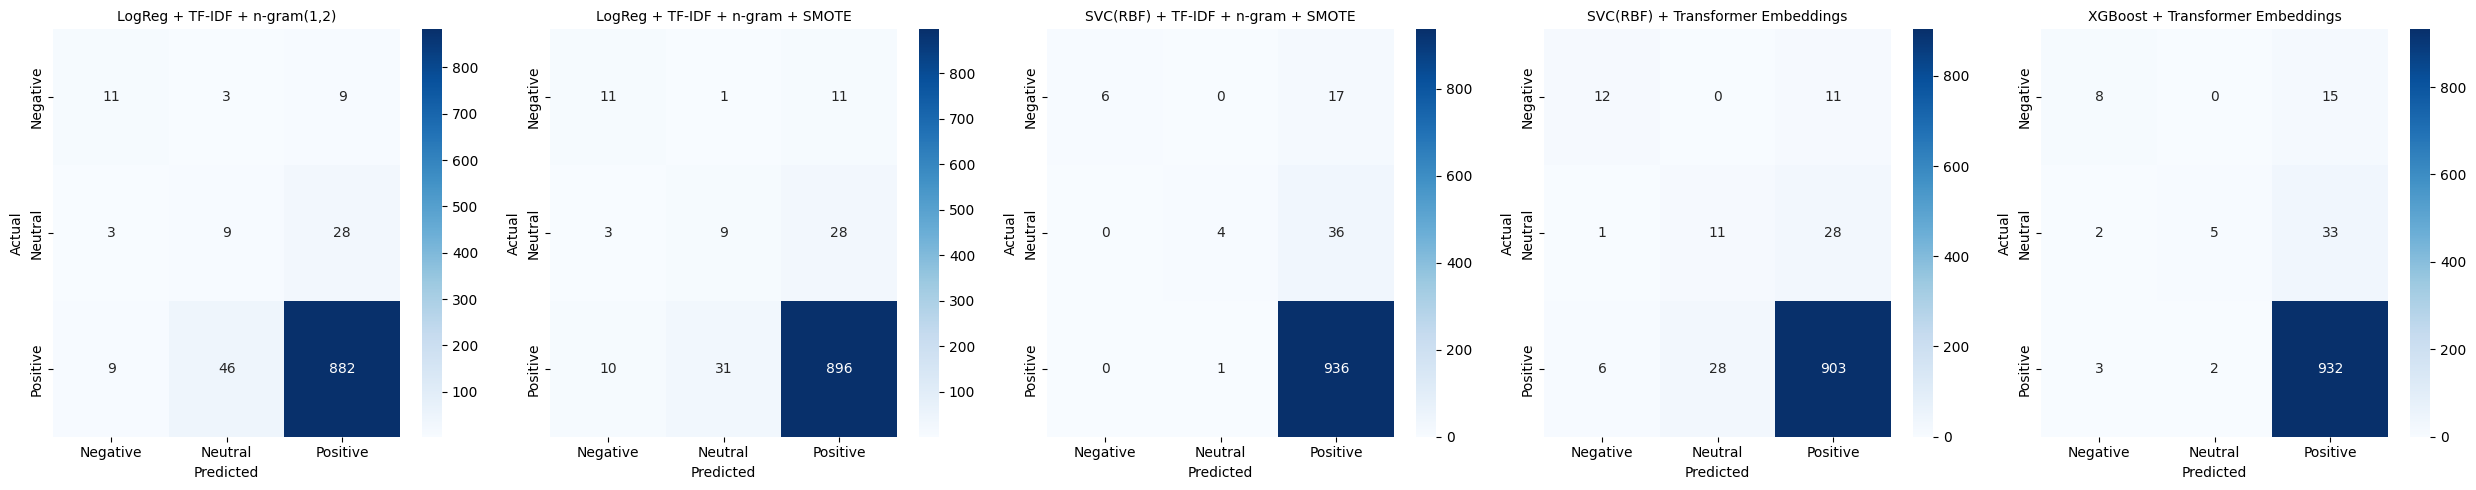

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Labels
labels = ['Negative', 'Neutral', 'Positive']

# Confusion matrices
cms = {
    "LogReg + TF-IDF + n-gram(1,2)": np.array([[389,78,40]
                                            [87,368,125]
                                            [532,1304,10657]]),
    
    "LogReg + TF-IDF + n-gram + SMOTE": np.array([[382,58,67]
                                                [80,325,175]
                                                [499,1030,10964]]),
    
    "SVC(RBF) + TF-IDF + n-gram + SMOTE": np.array([[303,12,192]
                                                    [13,253,314]
                                                    [32,76,12385]]),
    
    "SVC(RBF) + Transformer Embeddings": np.array([[12, 0, 11],
                                                   [1, 11, 28],
                                                   [6, 28, 903]]),
    
    "XGBoost + Transformer Embeddings": np.array([[8, 0, 15],
                                                  [2, 5, 33],
                                                  [3, 2, 932]])
}

# Plotting all confusion matrices side by side
fig, axes = plt.subplots(1, 5, figsize=(25,5))

for ax, (title, cm) in zip(axes, cms.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_title(title, fontsize=10)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


### 2. Bar chart

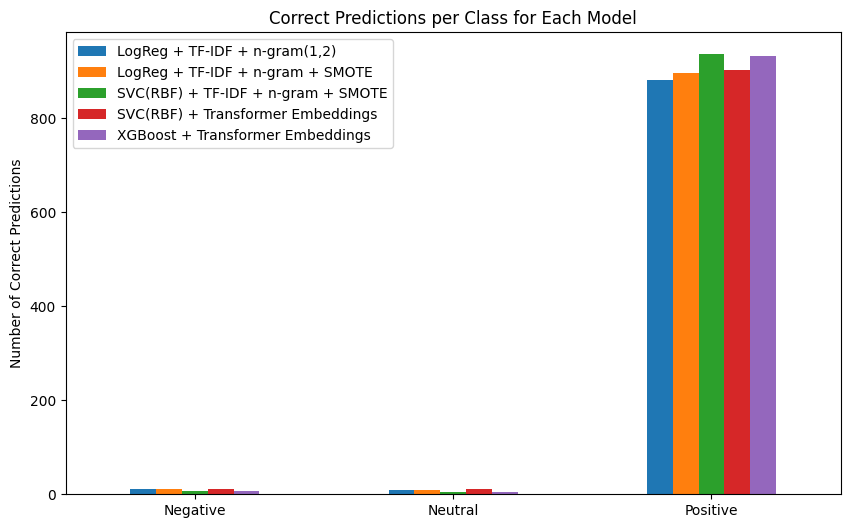

In [128]:
# Correct predictions per class (diagonal)
correct_preds = {model: np.diag(cm) for model, cm in cms.items()}

# Convert to DataFrame
import pandas as pd
df_correct = pd.DataFrame(correct_preds, index=labels)
df_correct.plot(kind='bar', figsize=(10,6))
plt.ylabel("Number of Correct Predictions")
plt.title("Correct Predictions per Class for Each Model")
plt.xticks(rotation=0)
plt.show()


## Plotting with the combined files results

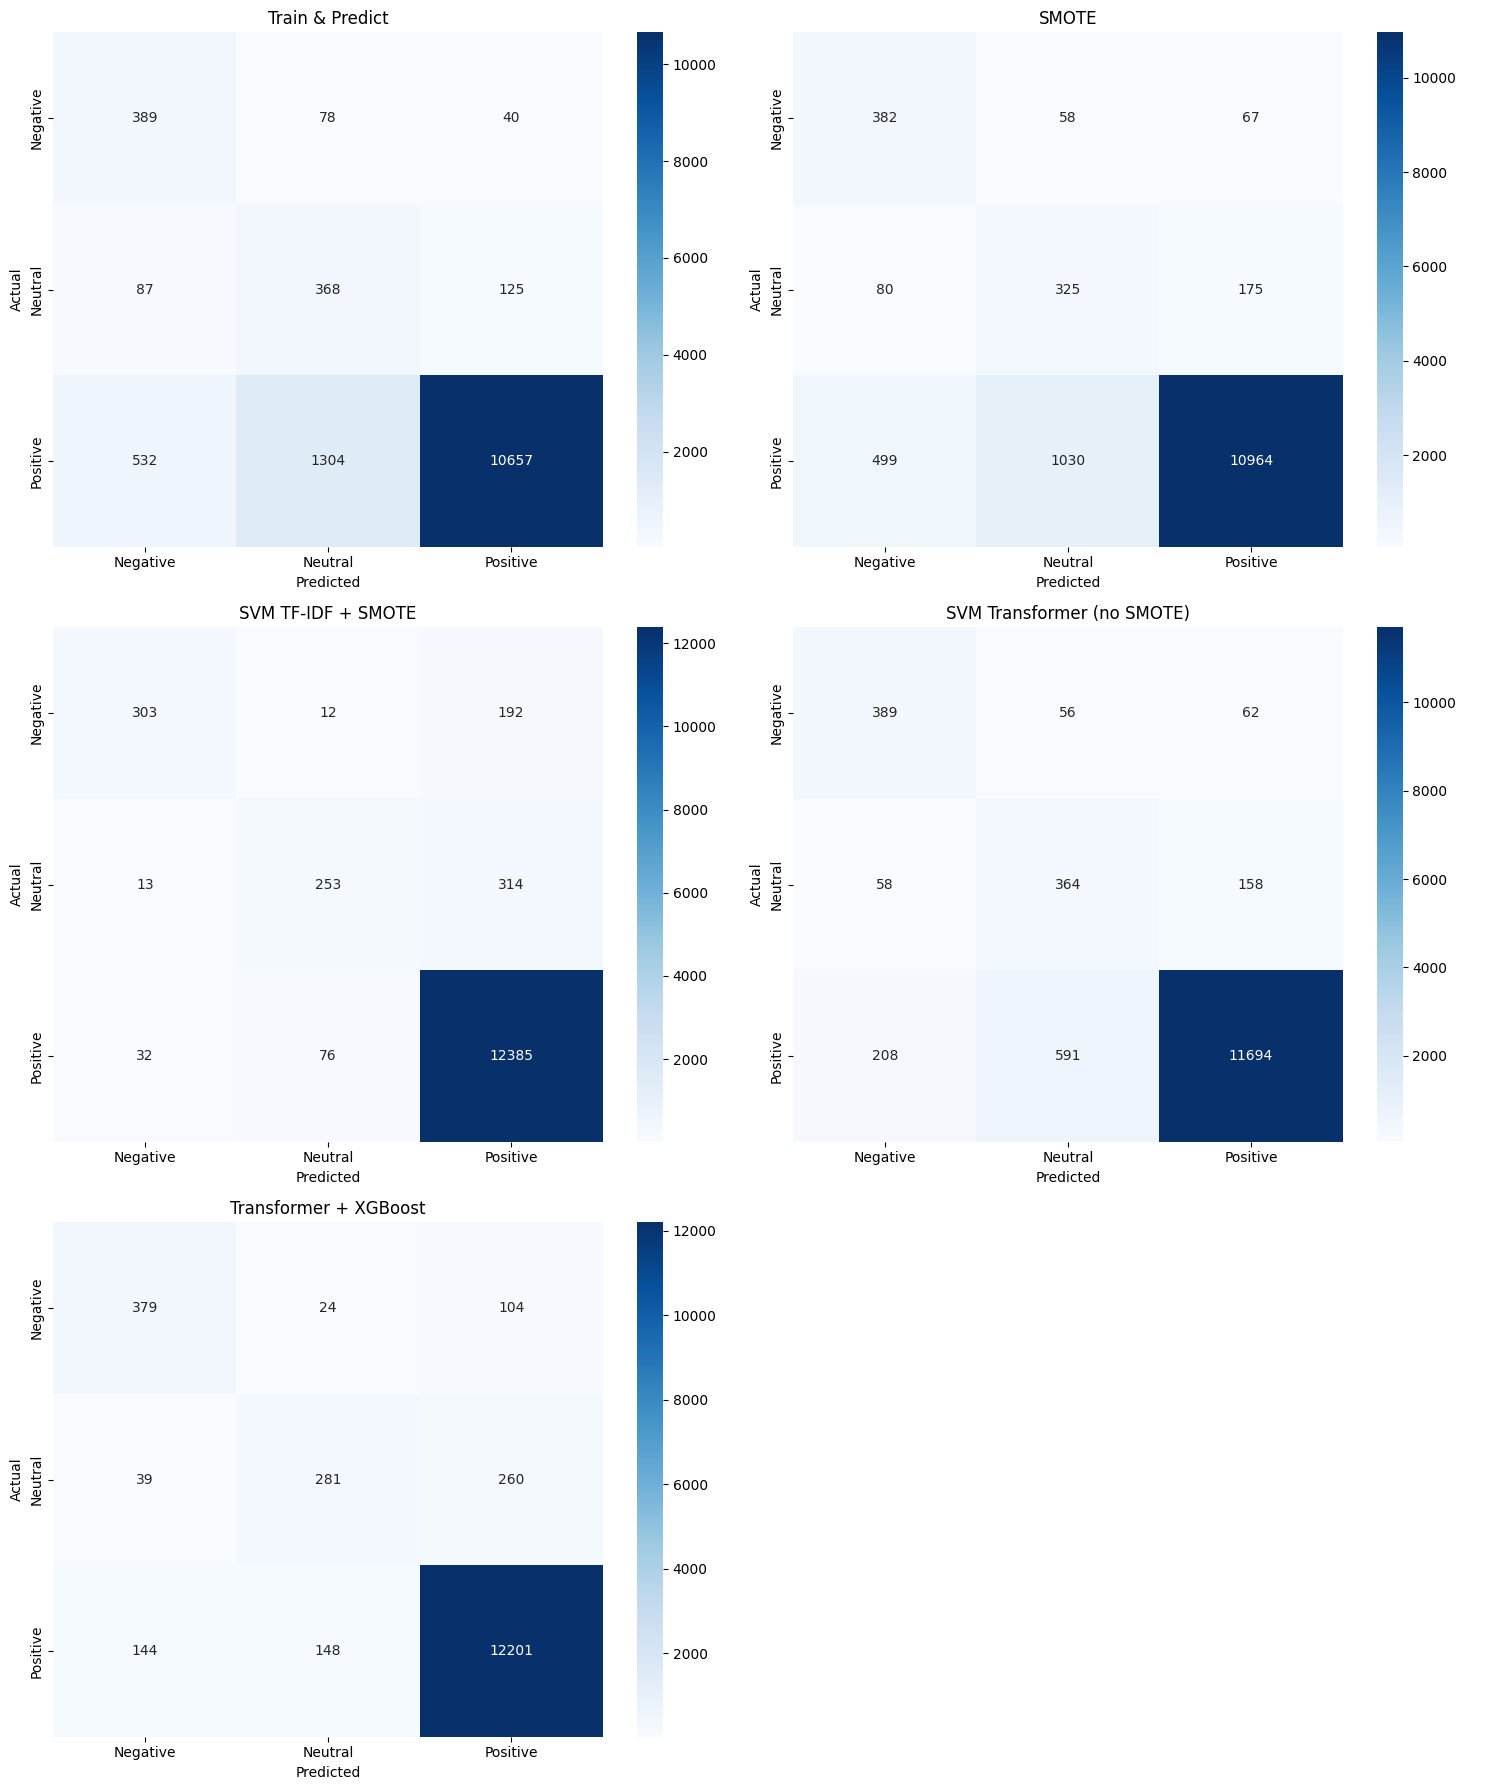

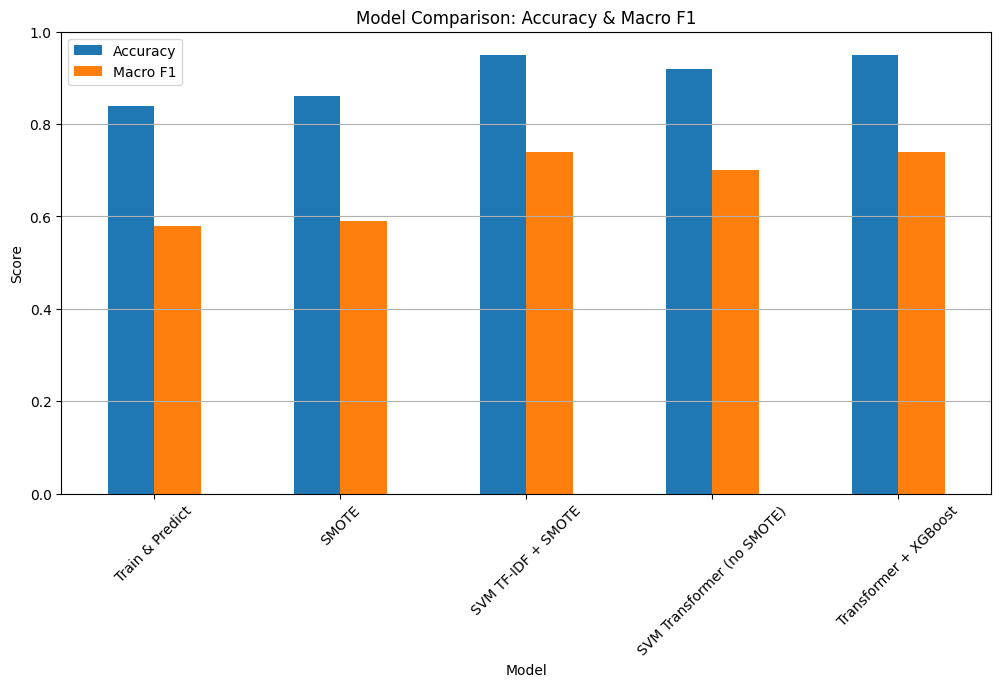

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Define the confusion matrices for each model
conf_matrices = {
    "Train & Predict": np.array([[389, 78, 40],
                                 [87, 368, 125],
                                 [532, 1304, 10657]]),
    "SMOTE": np.array([[382, 58, 67],
                       [80, 325, 175],
                       [499, 1030, 10964]]),
    "SVM TF-IDF + SMOTE": np.array([[303, 12, 192],
                                    [13, 253, 314],
                                    [32, 76, 12385]]),
    "SVM Transformer (no SMOTE)": np.array([[389, 56, 62],
                                            [58, 364, 158],
                                            [208, 591, 11694]]),
    "Transformer + XGBoost": np.array([[379, 24, 104],
                                       [39, 281, 260],
                                       [144, 148, 12201]])
}

# Define class labels
classes = ["Negative", "Neutral", "Positive"]

# Plot confusion matrices
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.flatten()

for i, (name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, ax=axes[i])
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
    axes[i].set_title(name)

# Remove empty subplot if any
if len(conf_matrices) < len(axes):
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

# Combine all metrics into a DataFrame for bar plots
metrics = {
    "Model": ["Train & Predict", "SMOTE", "SVM TF-IDF + SMOTE", "SVM Transformer (no SMOTE)", "Transformer + XGBoost"],
    "Accuracy": [0.84, 0.86, 0.95, 0.92, 0.95],
    "Macro F1": [0.58, 0.59, 0.74, 0.70, 0.74]
}

metrics_df = pd.DataFrame(metrics)

# Plot Accuracy & Macro F1 comparison
metrics_df.plot(x="Model", y=["Accuracy", "Macro F1"], kind="bar", figsize=(12,6))
plt.ylim(0,1)
plt.ylabel("Score")
plt.title("Model Comparison: Accuracy & Macro F1")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


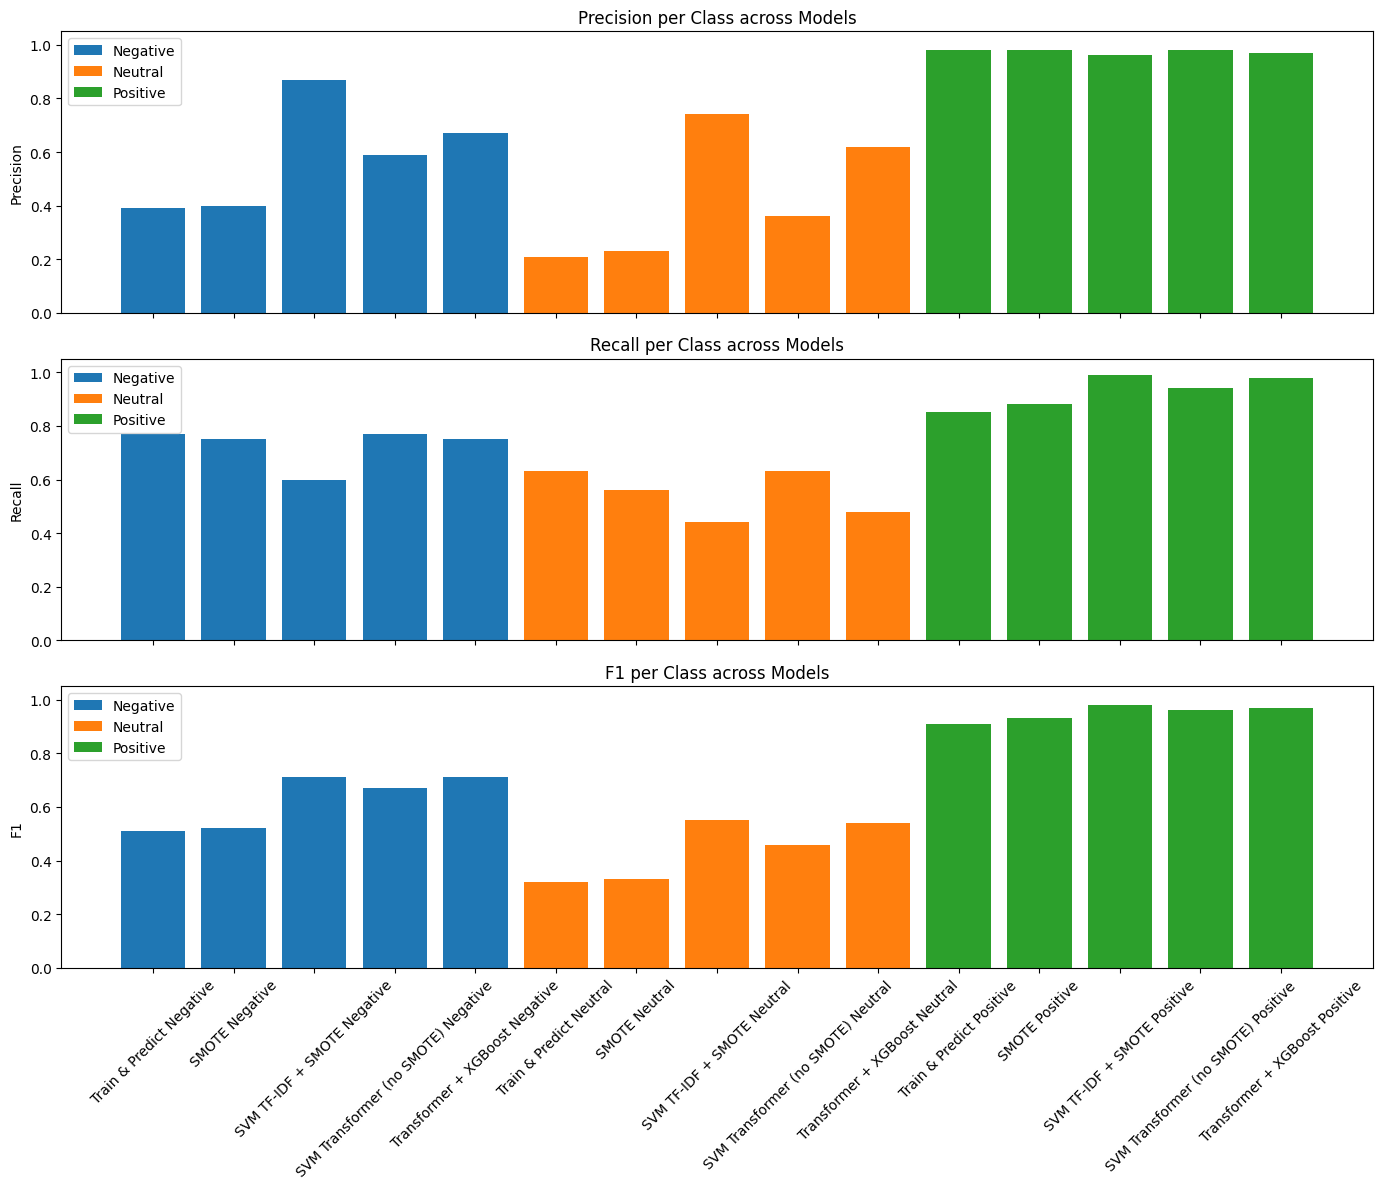

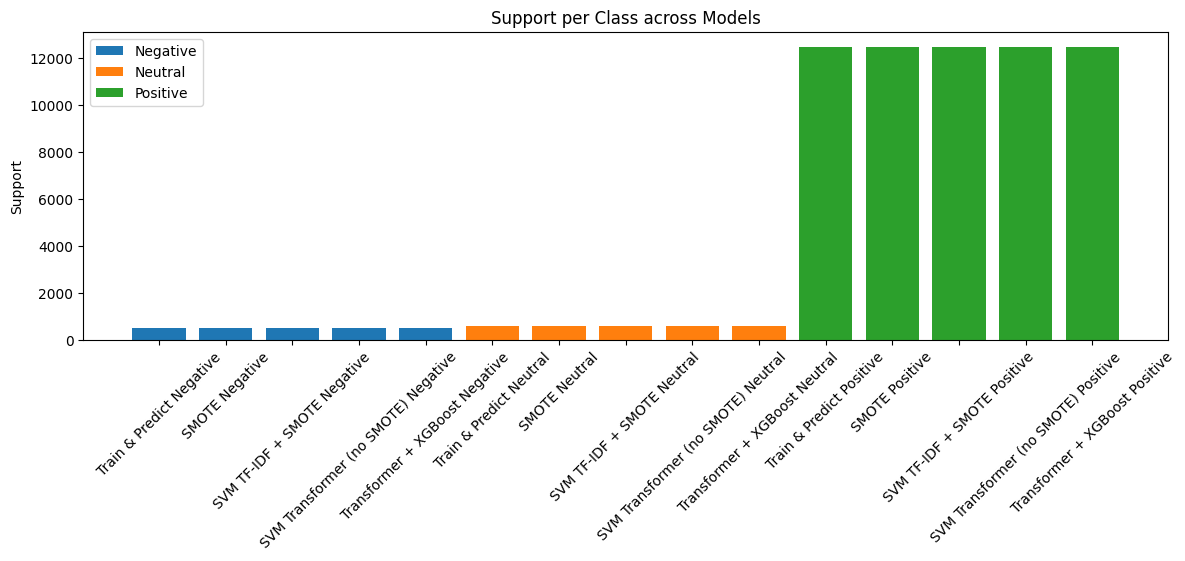

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1️⃣ Define metrics for each model
metrics_data = {
    "Train & Predict": {
        "Negative": {"precision":0.39, "recall":0.77, "f1":0.51, "support":507},
        "Neutral": {"precision":0.21, "recall":0.63, "f1":0.32, "support":580},
        "Positive": {"precision":0.98, "recall":0.85, "f1":0.91, "support":12493}
    },
    "SMOTE": {
        "Negative": {"precision":0.40, "recall":0.75, "f1":0.52, "support":507},
        "Neutral": {"precision":0.23, "recall":0.56, "f1":0.33, "support":580},
        "Positive": {"precision":0.98, "recall":0.88, "f1":0.93, "support":12493}
    },
    "SVM TF-IDF + SMOTE": {
        "Negative": {"precision":0.87, "recall":0.60, "f1":0.71, "support":507},
        "Neutral": {"precision":0.74, "recall":0.44, "f1":0.55, "support":580},
        "Positive": {"precision":0.96, "recall":0.99, "f1":0.98, "support":12493}
    },
    "SVM Transformer (no SMOTE)": {
        "Negative": {"precision":0.59, "recall":0.77, "f1":0.67, "support":507},
        "Neutral": {"precision":0.36, "recall":0.63, "f1":0.46, "support":580},
        "Positive": {"precision":0.98, "recall":0.94, "f1":0.96, "support":12493}
    },
    "Transformer + XGBoost": {
        "Negative": {"precision":0.67, "recall":0.75, "f1":0.71, "support":507},
        "Neutral": {"precision":0.62, "recall":0.48, "f1":0.54, "support":580},
        "Positive": {"precision":0.97, "recall":0.98, "f1":0.97, "support":12493}
    }
}

classes = ["Negative", "Neutral", "Positive"]
metrics = ["precision", "recall", "f1", "support"]

# 2️⃣ Convert to DataFrame for plotting
all_metrics = []
for model_name, class_dict in metrics_data.items():
    for cls in classes:
        row = {"Model": model_name, "Class": cls}
        row.update(class_dict[cls])
        all_metrics.append(row)

df_metrics = pd.DataFrame(all_metrics)

# 3️⃣ Plot precision, recall, f1 per class
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

for i, metric in enumerate(["precision", "recall", "f1"]):
    ax = axes[i]
    for cls in classes:
        subset = df_metrics[df_metrics["Class"]==cls]
        ax.bar(subset["Model"] + " " + cls, subset[metric], label=cls)
    ax.set_ylabel(metric.capitalize())
    ax.set_ylim(0,1.05)
    ax.set_title(f"{metric.capitalize()} per Class across Models")
    ax.tick_params(axis='x', rotation=45)
    ax.legend(classes)

plt.tight_layout()
plt.show()

# 4️⃣ Plot support
fig, ax = plt.subplots(figsize=(14,4))
for cls in classes:
    subset = df_metrics[df_metrics["Class"]==cls]
    ax.bar(subset["Model"] + " " + cls, subset["support"], label=cls)
ax.set_ylabel("Support")
ax.set_title("Support per Class across Models")
ax.tick_params(axis='x', rotation=45)
ax.legend(classes)
plt.show()
